# Here in this Notebook dataset we will try to check any KPIs of the customer and product successes for a company

In [2]:
# loaded the dataset and show all columns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# see tge type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking churned users

In [4]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
churn_user = df['Churn'].sum()

total_users = df.shape[0]
churn_rate = (churn_user / total_users) * 100

print(f"Number of chunr users: {churn_user}")
print(f"the churn rate: {churn_rate:.2f}%")

Number of chunr users: 1869
the churn rate: 26.54%


/tmp/ipython-input-2834872861.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


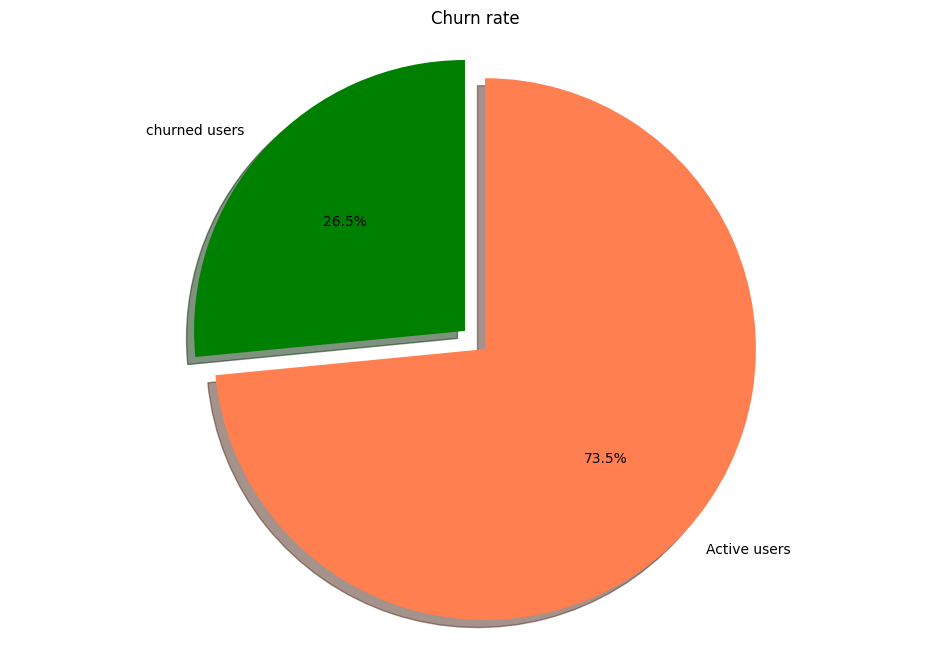

In [5]:
import matplotlib.pyplot as plt
labels = ['churned users', 'Active users']
sizes = [churn_rate, 100 - churn_rate]
colors = ['green', 'coral']
explode = (0.1, 0)

plt.figure(figsize=(12, 8))
plt.pie(sizes, explode=explode, labels=labels, colors= colors, autopct='%1.1f%%',
        startangle=90, shadow=True)
plt.title('Churn rate')
plt.axis('equal')
plt.show()

# chekcing new and existing users

In [6]:
activeusers = df[df['Churn'] == 0].shape[0]
activeusers2 = total_users - churn_user
retentionrate = (activeusers / total_users) * 100
print("active users total:", activeusers)
print("retention rate:", retentionrate )

active users total: 5174
retention rate: 73.4630129206304


In [7]:
tenurethreshold = 2
newusers = df[df['tenure'] <= tenurethreshold].shape[0]
print(f"new users (tenure <= {tenurethreshold} months): {newusers}")

new users (tenure <= 2 months): 862


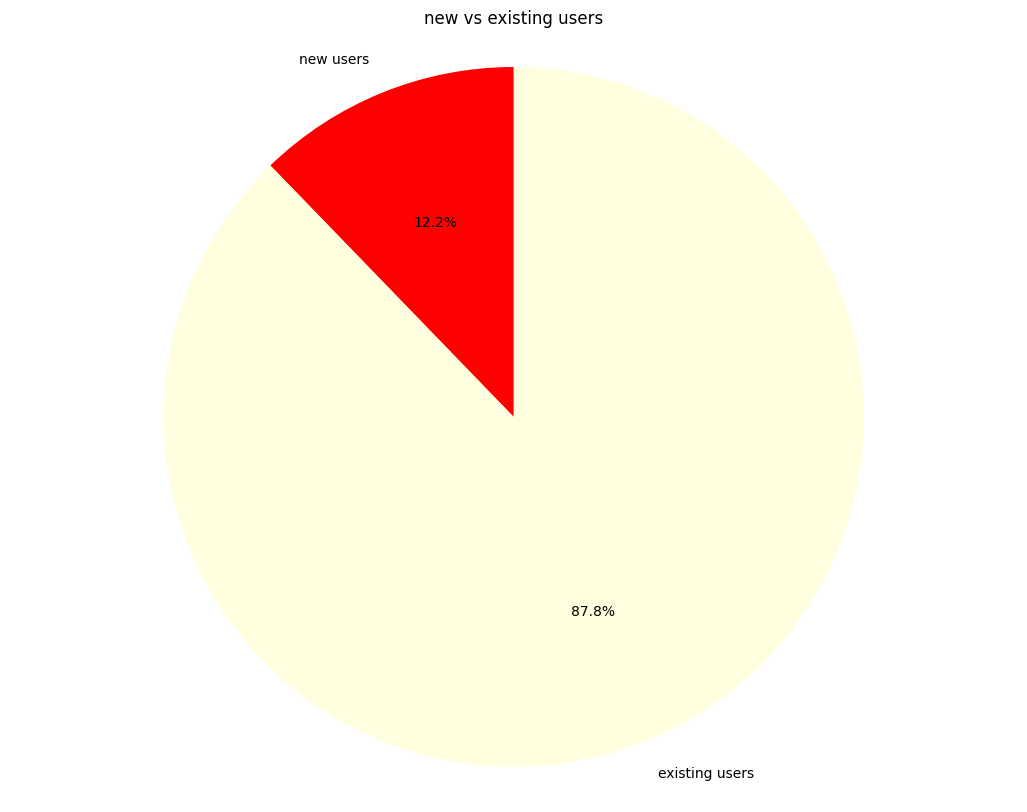

In [8]:
existingusers = total_users - newusers
labels = ['new users', 'existing users']
sizes = [newusers, existingusers]
colors = ['red', 'LightYellow']


plt.figure(figsize=(13, 10))
plt.pie(sizes, labels=labels, colors= colors,
        autopct='%1.1f%%', startangle=90)
plt.title('new vs existing users')
plt.axis('equal')
plt.show()

# product success

In [9]:
# check the relation between the services the churn rate
# which can show what services/products are successful

services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']
for service in services:
    print(f"    The Churn Analysis for {service}    ")
    print(pd.crosstab(df[service], df['Churn'], normalize='index') * 100)

    The Churn Analysis for OnlineSecurity    
Churn                        0          1
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194
    The Churn Analysis for DeviceProtection    
Churn                        0          1
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064
    The Churn Analysis for TechSupport    
Churn                        0          1
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341
    The Churn Analysis for OnlineBackup    
Churn                        0          1
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  

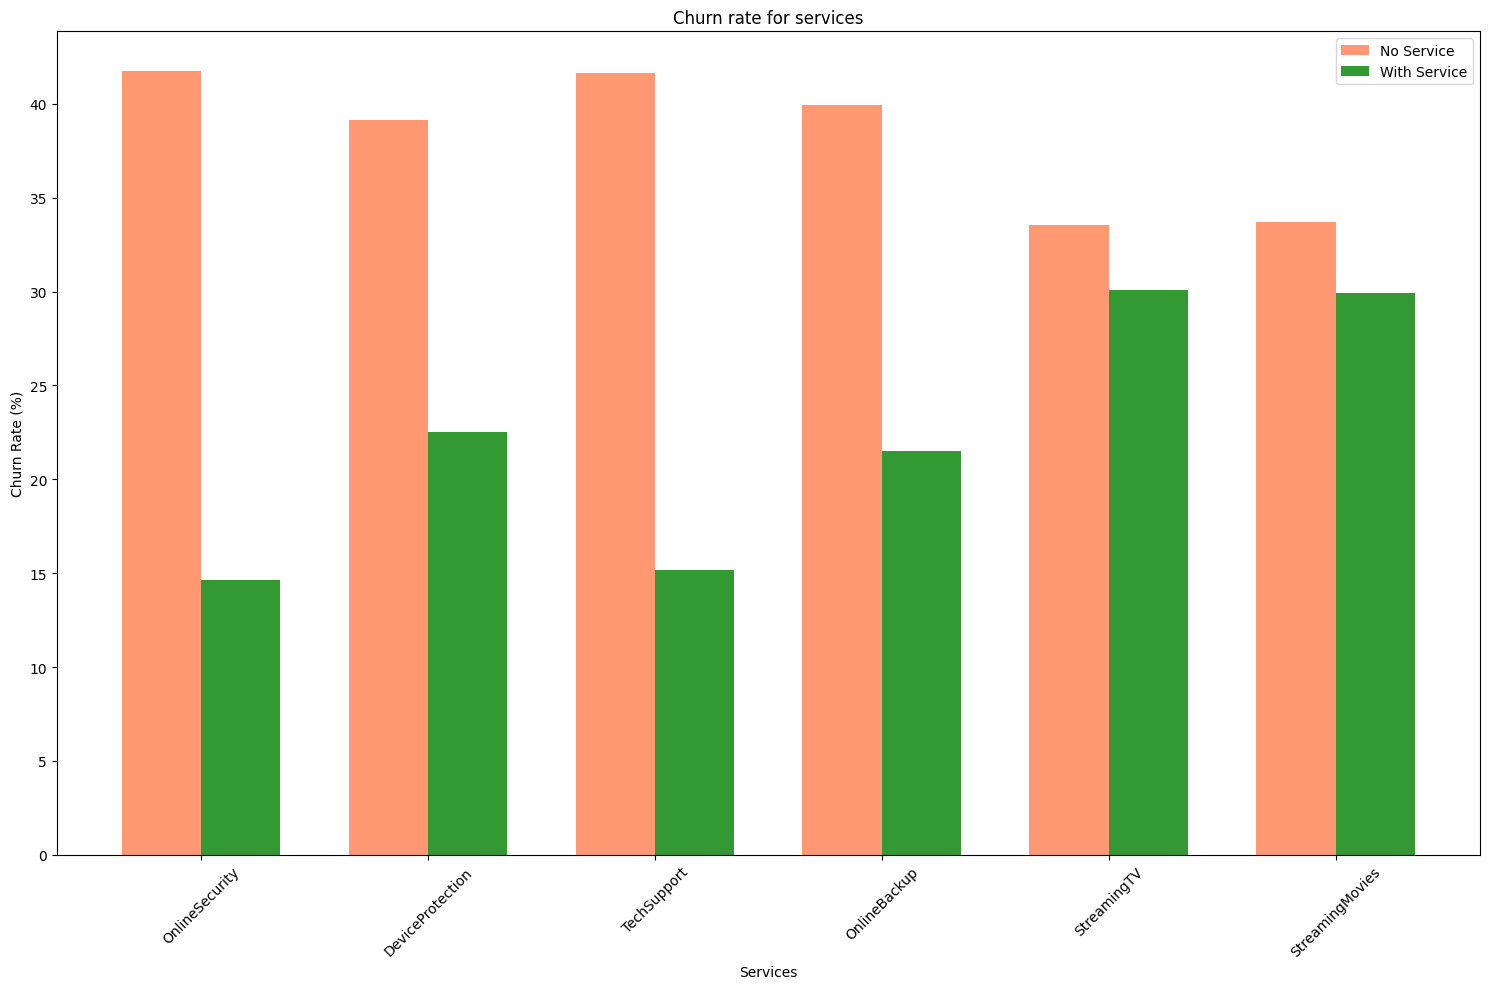

In [32]:
import numpy as np

service_churn_data = []
for service in services:
    churn_table = pd.crosstab(df[service], df['Churn'], normalize='index') * 100

    no_service_churn_rate = churn_table.loc['No', 1] if 'No' in churn_table.index else 0
    with_service_churn_rate = churn_table.loc['Yes', 1] if 'Yes' in churn_table.index else 0

    service_churn_data.append({'Service': service,
                               'No Service': no_service_churn_rate,
                               'With Service': with_service_churn_rate})
servicedf = pd.DataFrame(service_churn_data)

# the grouped bar chart
x = np.arange(len(servicedf))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 10))
bars1 = ax.bar(x-width/2, servicedf['No Service'], width, label='No Service', color='coral', alpha=0.8)
bars2 = ax.bar(x+width/2, servicedf['With Service'], width, label='With Service', color='green', alpha=0.8)

ax.set_xlabel('Services')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn rate for services')
ax.set_xticks(x)
ax.set_xticklabels(servicedf['Service'], rotation = 45)
ax.legend()

plt.tight_layout()
plt.show()

# Results


there is quite bug churnn rate around 26%

new users havea  lower rate of 17% that started using the srricce less than 2 months

we see the most customer churn when there is no tech support and online securirty the most, the company can work to improve performance and reducr he price of these services

Dataset reference:

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/input

